<a href="https://colab.research.google.com/github/Brendamartinez23/ProyectoDS_ParteII_-Martinez_Brenda_-Airbnb-.ipynb/blob/main/ProyectoDS_ParteII_%2BMartinez_Brenda_(Airbnb)_nvo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRESENTACIÓN**

*dataset*: AIRBNB

**Abstract**

Este proyecto analiza un conjunto de datos de listados de propiedades de Airbnb, con un enfoque en entender patrones y tendencias en los alquileres a corto plazo. El dataset contiene información detallada sobre cada propiedad, incluyendo la ubicación, tipo de habitación, precio, disponibilidad y reseñas. El objetivo es explorar y visualizar los datos para responder preguntas clave sobre el comportamiento del mercado de Airbnb, como la relación entre precio y tipo de habitación, que ciudades son más caras y analizar cuál sería el precio acorde para poner un departamento en aibnb.

**Preguntas de Interés para el Dataset de Airbnb**


-Brindarle información al modelo para resolver la pregunta principal: ¿Cuál es el precio acorde para poner mi departamento en AIRBNB?

Para eso corroborar:

-Identificación de outliers.

-Identificar un top 10 de las reseñas que dejan por ciudad.

-Identificar la relación entre la cantidad de Dormitorios y el Precio (Top 10 precios más altos)

-Identificar la distribución de precios por los países.

-Identificar precios por tipo o cantidad de habitaciones.

-Identificar un top 10 de las comodidades que se pueden encontrar dentro de cada casa.


-Para el entrenamiento del modelo buscar a través de longitud y latitud los barrios y países de cada casa o asignarle un área.

Se utilizará un entrenamiento de Regresión lineal y Regresión logarítica para ver cuál sería el acercamiento más próximo al resultado.


# **LECTURA DE DATOS**

**Librerías necesarias para el análisis de datos**

In [1]:
!pip install haversine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import BallTree
from haversine import haversine, Unit #Convertir latitud y longitud a radianes
from collections import Counter #Para identificar 'amenities'

**Configuración del entorno de Python con Google Colab**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd "drive/MyDrive/Estudios/Data Science I/"

/content/drive/MyDrive/Estudios/Data Science I


In [6]:
%pwd

'/content/drive/MyDrive/Estudios/Data Science I'

**Lectura del dataset**

In [7]:
df = pd.read_csv('airbnb.csv')

<ipython-input-7-95de011975d3>:1: DtypeWarning: Columns (6,59,97,98,100) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb.csv')


In [8]:
df.shape

(9001, 101)

In [9]:
# Mostrar las primeras 5 filas del Dataset seleccionado
df.head()

,datasetid,recordid,record_timestamp,geolocation,host_verifications,review_scores_communication,jurisdiction_names,availability_90,scrape_id,city,...,square_feet,security_deposit,interaction,monthly_price,weekly_price,notes,neighbourhood_group_cleansed,license,host_acceptance_rate,has_availability
0,airbnb-listings,1a2022a40a47773b00fbb1c8c889cddbb6b651e9,2020-07-31T22:00:07.811Z,"[52.35992696894107, 4.862859671199358]","email,phone,facebook,reviews",9.0,Amsterdam,0.0,2.017040e+13,Amsterdam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,airbnb-listings,8454854aa056a2b0ed34ddd670d7edea1296e91e,2020-07-31T22:00:07.811Z,"[52.36137101269532, 4.8738603256015365]","email,phone,reviews,jumio,government_id",10.0,Amsterdam,0.0,2.017040e+13,Amsterdam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,airbnb-listings,1933fd45487966194bd8b78a0455a7c680e006e4,2020-07-31T22:00:07.811Z,"[52.36456756846072, 4.875639539930118]","email,phone,reviews",NaN,Amsterdam,13.0,2.017040e+13,Amsterdam,...,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,airbnb-listings,8ab76fa454637cf4ef96ea02480a31a43a2ae908,2020-07-31T22:00:07.811Z,"[52.36464636933365, 4.8740486118580595]","email,phone,reviews,jumio,offline_government_i...",10.0,Amsterdam,1.0,2.017040e+13,Amsterdam,...,NaN,250.0,We are at your disposal and if not around we w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,airbnb-listings,8de0d285417aa0d49300a4878fc2f514ff31dfe6,2020-07-31T22:00:07.811Z,"[52.358295084395394, 4.859091947726598]","email,phone,facebook,reviews,work_email",9.0,Amsterdam,0.0,2.017040e+13,Amsterdam,...,NaN,NaN,NaN,1953.0,553.0,NaN,NaN,NaN,NaN,NaN


In [10]:
#Mostrar información del Dataset seleccionado
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9001 entries, 0 to 9000
Data columns (total 101 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    datasetid                       object 
 1    recordid                        object 
 2    record_timestamp                object 
 3    geolocation                     object 
 4    host_verifications              object 
 5    review_scores_communication     float64
 6    jurisdiction_names              object 
 7    availability_90                 float64
 8    scrape_id                       float64
 9    city                            object 
 10   number_of_reviews               float64
 11   bathrooms                       float64
 12   description                     object 
 13   review_scores_location          float64
 14   accommodates                    float64
 15   summary                         object 
 16   property_type                   object 
 17   bedrooms    

**Analisis inicial del dataset**

In [11]:
df.sample(10)

,datasetid,recordid,record_timestamp,geolocation,host_verifications,review_scores_communication,jurisdiction_names,availability_90,scrape_id,city,...,square_feet,security_deposit,interaction,monthly_price,weekly_price,notes,neighbourhood_group_cleansed,license,host_acceptance_rate,has_availability
4535,airbnb-listings,2f70bda1838d4220ff9781754c9c709843fb9639,2020-08-04T21:55:31.124Z,"[29.949516612495557, -90.04797212879723]","phone,reviews",10.0,"Louisiana State, New Orleans, LA",89.0,2.017060e+13,New Orleans,...,NaN,NaN,I will be in the home. I work nights. I am a v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7162,airbnb-listings,3f21cdf9d97d3d03c1c702d937196f3339cbc6d3,2020-08-04T04:11:52.856Z,"[39.55420383017556, 2.6067642105198154]","email,phone,reviews,jumio",10.0,NaN,34.0,2.017032e+13,Palma de Mallorca,...,NaN,150.0,And if you need something or you have question...,NaN,NaN,Just enjoy it!,NaN,NaN,NaN,NaN
5292,airbnb-listings,9c3238409754c574cc99feba2b680e95497b1b6f,2020-08-03T11:04:53.67Z,"[34.04482864262821, -118.25796065363268]","email,phone,reviews",10.0,"City of Los Angeles, CA",32.0,2.017050e+13,Los Angeles,...,NaN,150.0,We want you to feel at home so feel free to re...,NaN,NaN,Great dining and access to modern LA,NaN,NaN,NaN,NaN
2725,airbnb-listings,d6d1b2bb47deb15a8ed69c341e9a6c19ac0b5cac,2020-08-02T00:22:57.999Z,"[41.91010068372407, -87.69292368275366]","email,phone,reviews,jumio",10.0,"Illinois State, Cook County, IL, CHICAGO",2.0,2.017051e+13,Chicago,...,NaN,100.0,NaN,NaN,NaN,NaN,NaN,City registration pending,NaN,NaN
2109,airbnb-listings,cee8bb4f4895fa924f6a715188beb19ca73b7938,2020-08-01T13:47:46.907Z,"[52.540743556593846, 13.350849423720245]","email,phone",NaN,NaN,90.0,2.017051e+13,Berlin,...,NaN,NaN,NaN,NaN,NaN,NaN,Mitte,NaN,NaN,NaN
6073,airbnb-listings,88e4e14b5767c134dca94d2d5d6bcfe1bb299752,2020-08-02T17:09:33.658Z,"[51.439540444118364, -0.19865253074659944]","email,phone,reviews",NaN,NaN,88.0,2.017030e+13,London,...,NaN,NaN,We can arrange to stay nearby on these dates,NaN,NaN,Our home is well setup for a young family and ...,NaN,NaN,NaN,NaN
4963,airbnb-listings,0918cef4fe84ff4c15cf0918bbab0d9349e0fd13,2020-08-03T23:30:34.794Z,"[40.42514991439447, -3.705942548141491]","email,phone,reviews,jumio",10.0,NaN,68.0,2.017041e+13,Madrid,...,NaN,NaN,"I always love to receive people at home, so I ...",750.0,215.0,NaN,Centro,NaN,NaN,NaN
4188,airbnb-listings,f3eba4802718c7f99b476122b1f4e19b9170fe9a,2020-08-05T00:02:25.227Z,"[40.7301753528895, -73.98528496956672]","email,phone,reviews,jumio",NaN,NaN,0.0,2.017050e+13,New York,...,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan,NaN,NaN,NaN
324,airbnb-listings,bc02f935370e70054bb6555ffa78684611a542e6,2020-08-01T02:37:25.479Z,"[37.97304497080247, 23.74575012851063]","email,phone",NaN,NaN,30.0,2.017051e+13,Athina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8573,airbnb-listings,256ba199a74ea0a7fd96b0cb7d0820570ada5fbb,2020-08-02T02:05:43.64Z,"[55.67601167561316, 12.597658755248679]","email,phone,facebook,reviews",10.0,NaN,41.0,2.017062e+13,Copenhagen,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail(5)

,datasetid,recordid,record_timestamp,geolocation,host_verifications,review_scores_communication,jurisdiction_names,availability_90,scrape_id,city,...,square_feet,security_deposit,interaction,monthly_price,weekly_price,notes,neighbourhood_group_cleansed,license,host_acceptance_rate,has_availability
8996,airbnb-listings,5695f3ef1951b189d6d254657b3ddaafa6f7b4a6,2020-08-02T17:09:33.658Z,"[51.513360603497496, -0.19992245310692325]","email,phone,reviews,kba",NaN,NaN,9.0,2.017030e+13,London,...,NaN,NaN,I will be in London during the full rental per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8997,airbnb-listings,ca87ae4177a0bed3a76fe6cdcfb91c25d5ae1d10,2020-08-02T17:09:33.658Z,"[51.51080876203868, -0.19379532121166604]","email,phone,reviews",10.0,NaN,0.0,2.017030e+13,London,...,NaN,100.0,I live locally and will be there to greet you....,2750.0,750.0,Prices during the Christmas and New Year Holid...,NaN,NaN,NaN,NaN
8998,airbnb-listings,12bdc997939878bd338a22111d5fdfb900bad113,2020-08-02T17:09:33.658Z,"[51.49633930232341, -0.17898362425702327]","email,phone,reviews",10.0,NaN,6.0,2.017030e+13,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8999,airbnb-listings,6308a94825629351624561f2685d9e800f021a3b,2020-08-02T17:09:33.658Z,"[51.52518486403514, -0.20695410315862162]","email,phone,reviews,jumio",NaN,NaN,89.0,2.017030e+13,London,...,NaN,250.0,I'm a friendly bubbly easy person to get along...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9000,airbnb-listings,89449cabfd2d43ceb11e3bbbb2ee719a1f93769b,2020-08-02T17:09:33.658Z,"[51.51880631947564, -0.21256134231418855]","email,phone,reviews",10.0,NaN,58.0,2.017030e+13,London,...,NaN,NaN,Jason will be there to greet you and help with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Selección de las columnas de interés a desarrollar
df = df[[
    'property_type',
    'country',
    'city',
    'bathrooms',
    'number_of_reviews',
    'room_type',
    'bed_type',
    'amenities',
    'price',
    'extra_people',
    'availability_365',
    'geolocation',
    'neighbourhood',
    'guests_included',
    'square_feet',
    'bedrooms',
    'beds',
    'review_scores_value',#satisfaccion promedio
    'features',
    ]]

**Diccionario de variables**

**property_type**: tipo de propiedad

**country**: país

**city**: ciudad

**bathrooms**: baños

**number_of_reviews**: número de reseñas

**room_type:** tipo de habitación

**bed_type**: tipo de cama

**amenities**: comodidades

**price**: precio

**extra_people**: personas adicionales

**availability_365**: disponibilidad 365 días

**geolocation**: geolocalización

**neighbourhood**: vecindario

**guests_included**: huéspedes incluidos

**square_feet: metros** cuadrados

**bedrooms**: dormitorios

**beds**: camas

**review_scores_value**: puntuación promedio de satisfacción

**features**: características

# **ANALISIS EXPLORATORIO DE LOS DATOS**

In [14]:
#Identificar Variables Categóricas
df.dtypes

,0
property_type,object
country,object
city,object
bathrooms,float64
number_of_reviews,float64
room_type,object
bed_type,object
amenities,object
price,float64
extra_people,float64


In [15]:
df.columns

Index(['property_type', 'country', 'city', 'bathrooms', 'number_of_reviews',
       'room_type', 'bed_type', 'amenities', 'price', 'extra_people',
       'availability_365', 'geolocation', 'neighbourhood', 'guests_included',
       'square_feet', 'bedrooms', 'beds', 'review_scores_value', 'features'],
      dtype='object')

In [16]:
df.dtypes.value_counts()

,count
float64,10
object,9


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,8978.0,1.259078,0.614008,0.0,1.0,1.0,1.0,8.0
number_of_reviews,9000.0,15.307778,30.093272,0.0,1.0,4.0,16.0,417.0
price,8796.0,153.619259,176.044331,10.0,52.0,92.0,167.0,999.0
extra_people,9000.0,14.333778,39.190568,0.0,0.0,0.0,15.0,750.0
availability_365,9000.0,165.684778,140.471899,0.0,13.0,150.0,314.0,365.0
guests_included,9000.0,1.530556,1.236713,0.0,1.0,1.0,2.0,16.0
square_feet,209.0,1150.842105,7998.280749,0.0,0.0,538.0,904.0,115863.0
bedrooms,8997.0,1.430921,0.984107,0.0,1.0,1.0,2.0,10.0
beds,8983.0,1.976177,1.604620,1.0,1.0,1.0,2.0,16.0
review_scores_value,6639.0,9.320681,0.900794,2.0,9.0,10.0,10.0,10.0


In [18]:
df.describe(include=['object']).T

,count,unique,top,freq
property_type,8999,26,Apartment,6407
country,9000,13,United States,2844
city,8984,667,London,777
room_type,9000,3,Entire home/apt,5397
bed_type,9000,5,Real Bed,8771
amenities,8927,8705,Family/kid friendly,11
geolocation,9001,9001,"[52.35992696894107, 4.862859671199358]",1
neighbourhood,6023,849,Williamsburg,130
features,8992,92,"Host Has Profile Pic,Host Identity Verified,Is...",2213


- **Calcular la matriz de correlación**

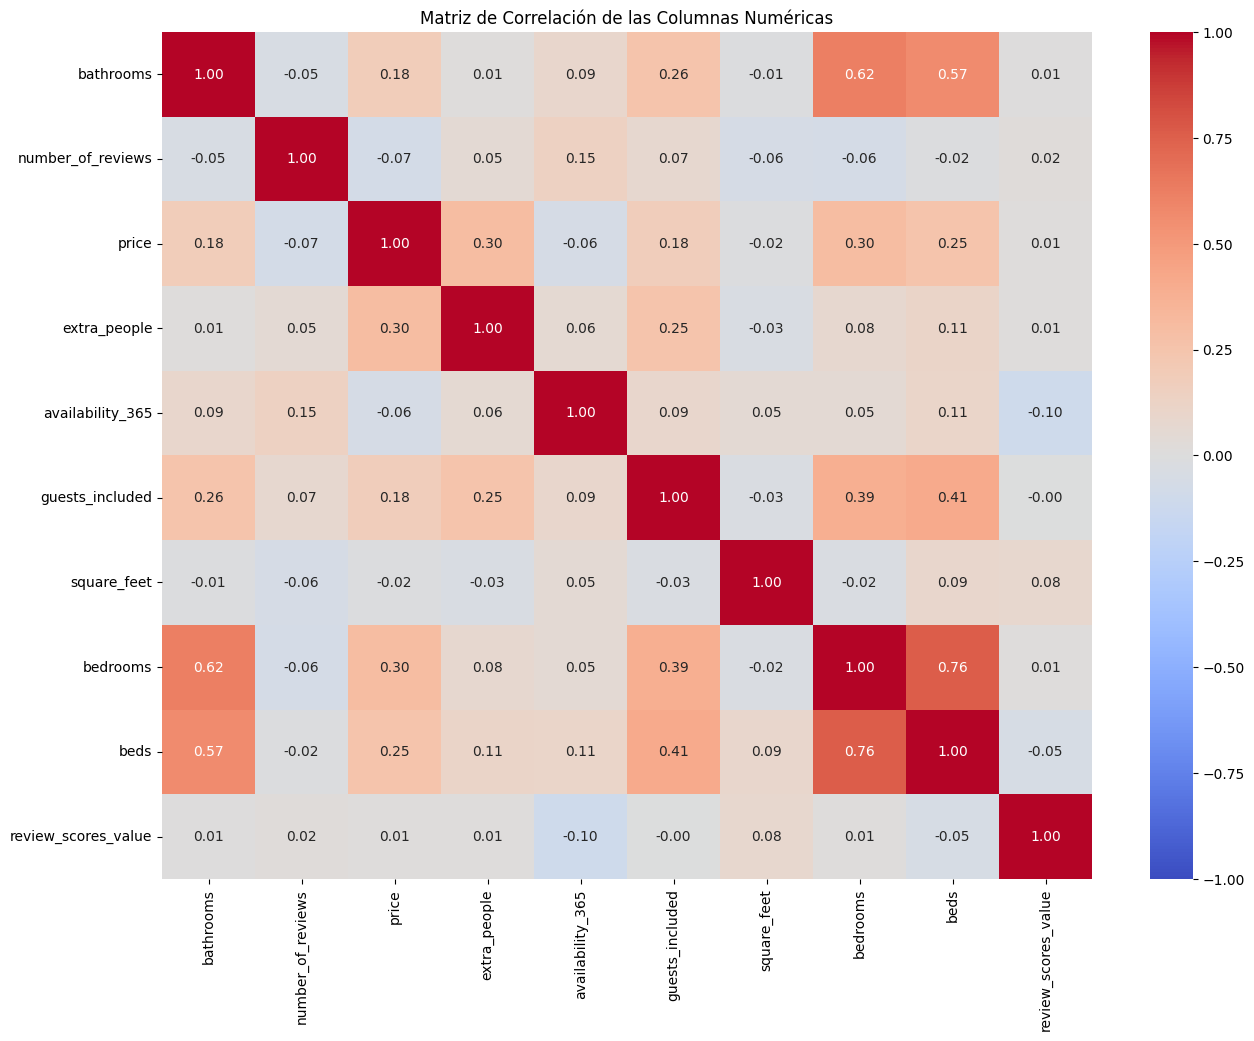

In [19]:
# Filtrar el DataFrame para incluir solo columnas de tipo int y float
df_numeric = df.select_dtypes(include=['int', 'float'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 11))

# Crear un heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Configurar título
plt.title('Matriz de Correlación de las Columnas Numéricas')

# Mostrar el gráfico
plt.show()

**Relización de gráficos**.

1.**Boxplot de  la variable objetivo 'price' para ver los ouliers de éstos y ver que es lo que está afectando.**

Resolución: En este gráfico se puede identificar la cantidad de ouliers que conviene la columna 'price'

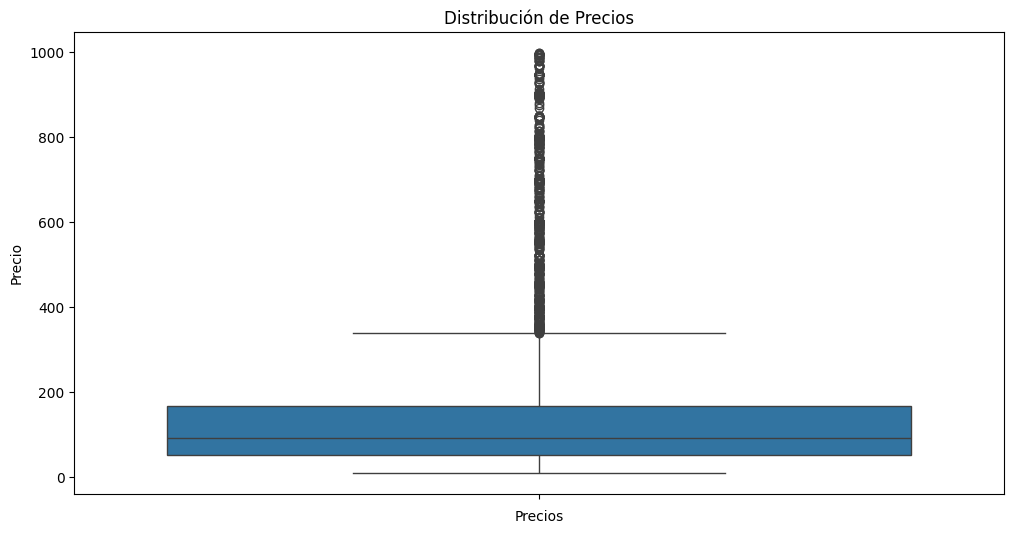

In [20]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear un boxplot de la columna 'price'
sns.boxplot(y='price', data=df)

# Configurar título y etiquetas
plt.title('Distribución de Precios')
plt.xlabel('Precios')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()

**2. Número de Reseñas por Ciudad (Top 10 ciudades con más reseñas)**

Resolución: Este gráfico de barras horizontales muestra las 10 ciudades con más reseñas en el dataset. Al identificar estas ciudades, podemos entender mejor en qué lugares las propiedades de Airbnb son más populares y frecuentadas por los huéspedes. Las ciudades con un alto número de reseñas, como New York y Barcelona, destacan por ser destinos turísticos populares, lo que también puede influir en la percepción de la calidad y la demanda de las propiedades en estas áreas.

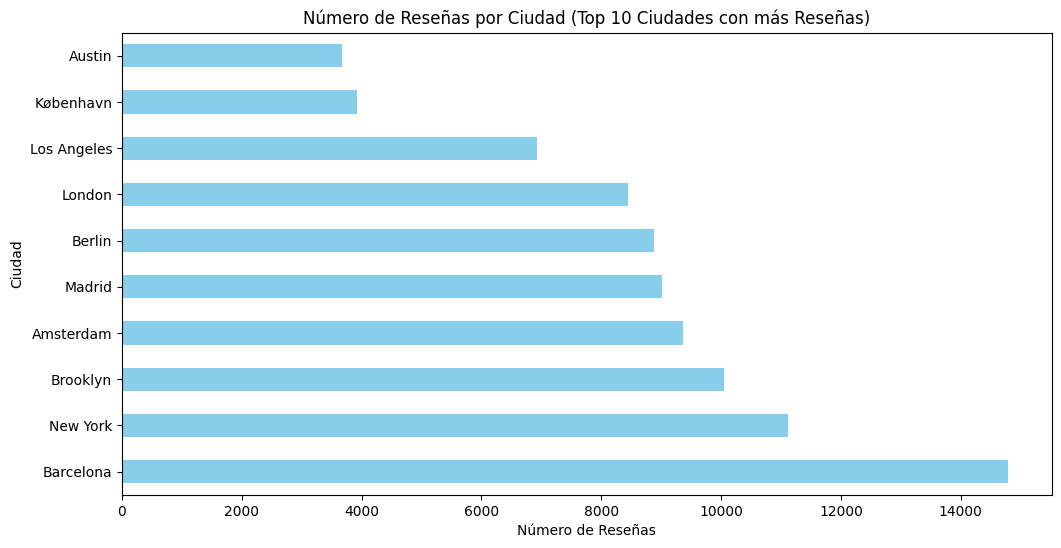

In [21]:
# Agrupar y ordenar por número de reseñas, luego seleccionar los top 10
top_10_city_reviews = df.groupby('city')['number_of_reviews'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_city_reviews.plot(kind='barh', color='skyblue')
plt.title('Número de Reseñas por Ciudad (Top 10 Ciudades con más Reseñas)')
plt.xlabel('Número de Reseñas')
plt.ylabel('Ciudad')
plt.show()


**3. Relación entre la cantidad de Dormitorios y el Precio (Top 10 precios más altos)**

Resolución: El gráfico de dispersión muestra la relación entre el número de dormitorios y el precio para los 10 precios más altos en el dataset. Este análisis nos ayuda a comprender cómo el número de dormitorios influye en el precio de las propiedades.

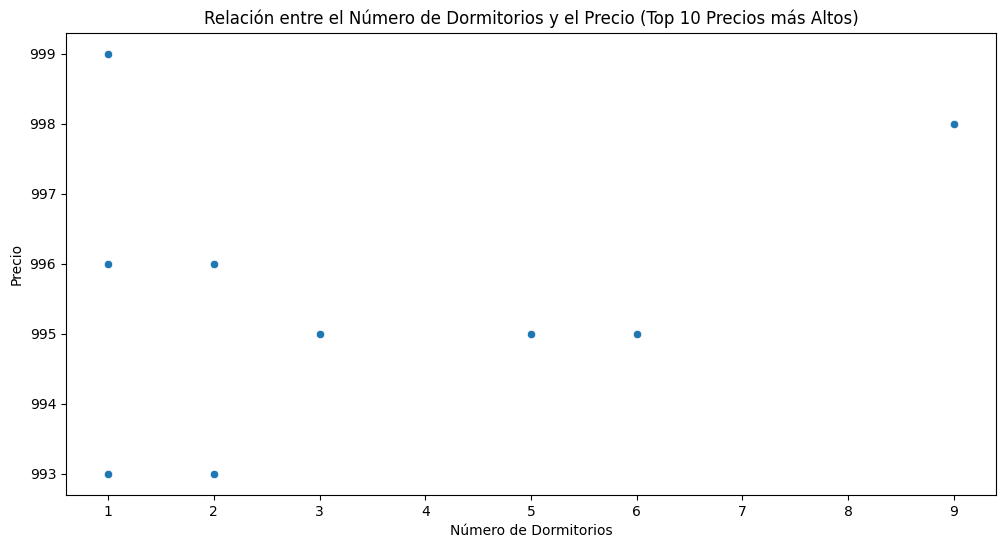

In [22]:
# Seleccionar los 10 precios más altos
top_10_price = df.nlargest(10, 'price')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='bedrooms', y='price', data=top_10_price)
plt.title('Relación entre el Número de Dormitorios y el Precio (Top 10 Precios más Altos)')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio')
plt.show()

**4. Distribución de Precios por País (Gráfico de Torta)**

Resolución: Este gráfico de torta muestra la distribución porcentual de los precios más altos entre diferentes países. Visualizar esta distribución porcentual nos ayuda a comprender qué países contribuyen más significativamente a los precios más altos en el dataset.

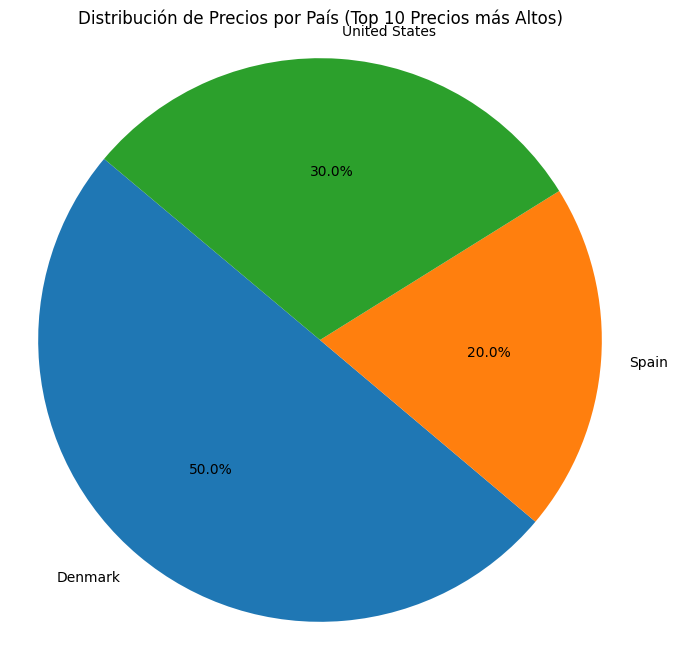

In [23]:
# Seleccionar los 10 precios más altos
top_10_price = df.nlargest(10, 'price')

# Agrupar por país y sumar los precios
country_prices = top_10_price.groupby('country')['price'].sum()

plt.figure(figsize=(8, 8))
plt.pie(country_prices, labels=country_prices.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Precios por País (Top 10 Precios más Altos)')
plt.axis('equal')
plt.show()

**5. Distribución de Precios (Histograma)**
Resolución: El histograma muestra cómo se distribuyen en general los precios de todas las propiedades en el dataset. Observando la forma y la dispersión del histograma, podemos identificar patrones de distribución de precios, como la concentración en rangos específicos o la presencia de outliers.

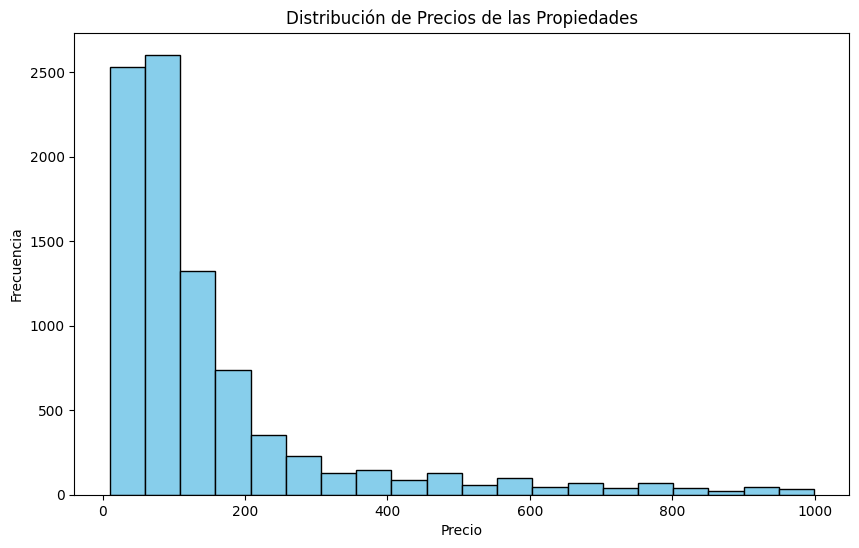

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios de las Propiedades')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

**6. Precios por Tipo de Habitación (Top 10 Precios más Altos)**

Resolución: Este gráfico de caja y bigotes muestra la distribución de los precios de los 10 precios más altos según el tipo de habitación. Al comparar los diferentes tipos de habitaciones, podemos entender mejor cómo el tipo de habitación (por ejemplo, casa entera, habitación privada) influye en el precio de las propiedades más caras.

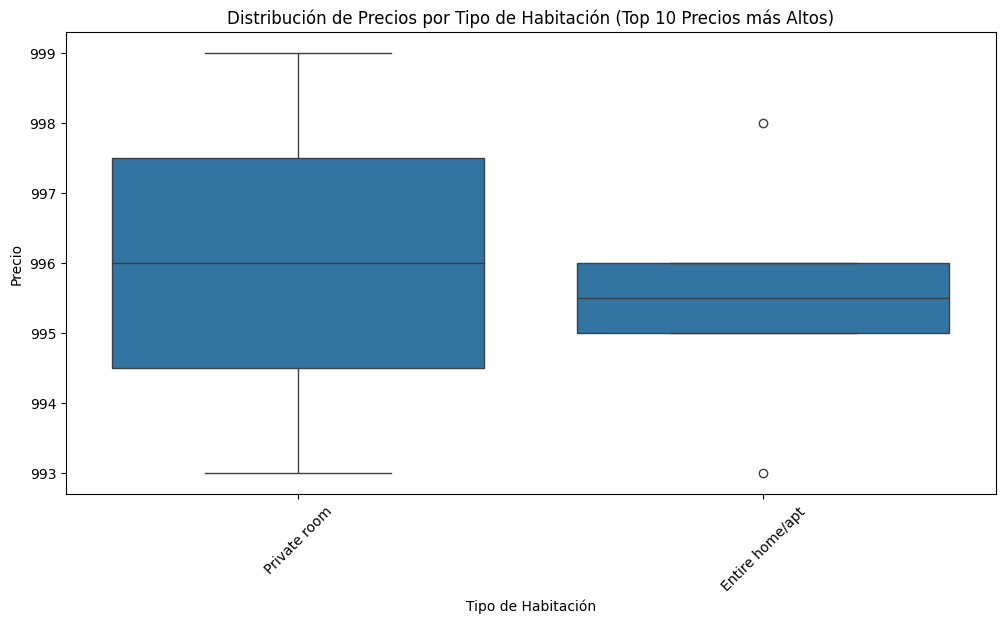

In [25]:
# Seleccionar los 10 precios más altos
top_10_price = df.nlargest(10, 'price')

plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=top_10_price)
plt.title('Distribución de Precios por Tipo de Habitación (Top 10 Precios más Altos)')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

7.**- Visualización de cantidad vs precio.**


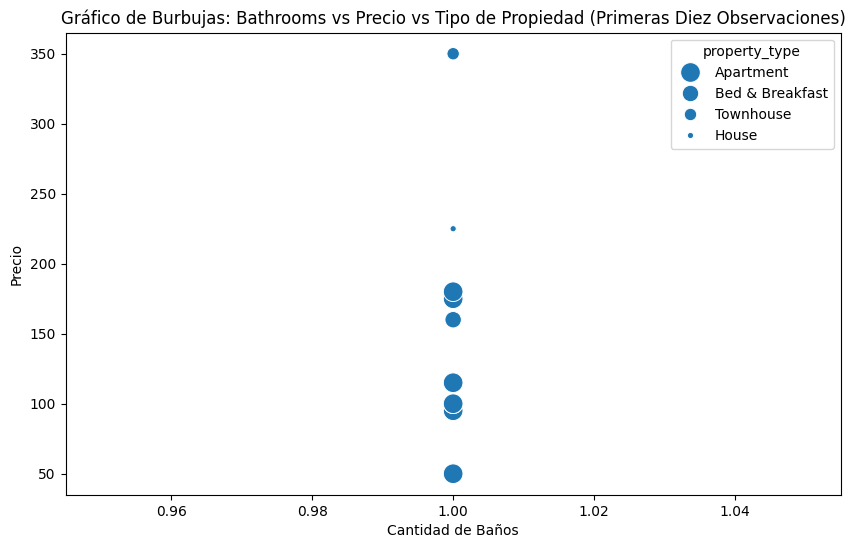

In [26]:
# Seleccionar las primeras diez observaciones
df_top_10 = df.head(10)

# Crear el gráfico de burbujas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bathrooms',
    y='price',
    size='property_type',  # Utilizamos 'property_type' para el tamaño de la burbuja
    sizes=(20, 200),  # Definimos el rango de tamaños de las burbujas
    data=df_top_10  # Utilizamos solo las primeras diez observaciones
)
plt.title('Gráfico de Burbujas: Bathrooms vs Precio vs Tipo de Propiedad (Primeras Diez Observaciones)')
plt.xlabel('Cantidad de Baños')
plt.ylabel('Precio')
plt.show()

8.**Identificar un top 10 de las comodidades que se pueden encontrar dentro de cada casa.**

Resolución:  Se identifica o lo que más ofrecen los inquilinos y da un resultado más amigable o que le da el valor a casa son: Wifi, cocina, calefacción, esenciales (Agua, luz, mesa, etc).

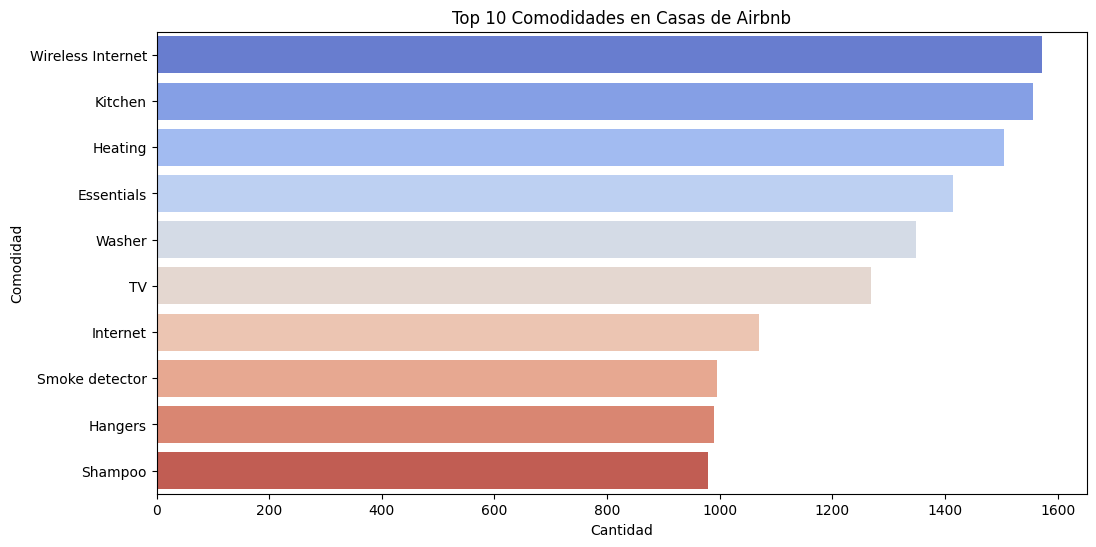

In [30]:
# Filtrar solo las casas y hacer una copia para evitar SettingWithCopyWarning
df_houses = df[df['property_type'] == 'House'].copy()

# Asegurarse de que la columna 'amenities' no tiene valores nulos
df_houses['amenities'] = df_houses['amenities'].fillna('')

# Dividir las comodidades en listas
df_houses['amenities_list'] = df_houses['amenities'].apply(lambda x: x.split(','))

# Flatten la lista de comodidades
all_amenities = [item.strip() for sublist in df_houses['amenities_list'] for item in sublist]

# Contar la frecuencia de cada amenidad
amenities_counter = Counter(all_amenities)

# Obtener el top 10 de comodidades más comunes
top_10_amenities = amenities_counter.most_common(10)

# Convertir el top 10 a un DataFrame para facilitar la visualización
top_10_amenities_df = pd.DataFrame(top_10_amenities, columns=['Amenity', 'Count'])

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras asignando la variable hue y desactivando la leyenda
sns.barplot(x='Count', y='Amenity', data=top_10_amenities_df, hue='Amenity', palette='coolwarm', legend=False)

# Configurar títulos y etiquetas
plt.title('Top 10 Comodidades en Casas de Airbnb')
plt.xlabel('Cantidad')
plt.ylabel('Comodidad')

# Mostrar el gráfico
plt.show()



# **Limpieza de outliers de la columna 'price' (Variable objetivo)**

In [31]:
# Verificar los valores atípicos en la columna 'price'
print(df['price'].describe())


count    8796.000000
mean      153.619259
std       176.044331
min        10.000000
25%        52.000000
50%        92.000000
75%       167.000000
max       999.000000
Name: price, dtype: float64


In [32]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Determinar los límites inferior y superior, asegurando que el límite inferior no sea negativo
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Mostrar los límites y el tamaño del DataFrame original y filtrado
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Size of original DataFrame: {len(df)}')
print(f'Size of filtered DataFrame: {len(df)}')

Q1: 52.0
Q3: 167.0
IQR: 115.0
Lower Bound: 0
Upper Bound: 339.5
Size of original DataFrame: 7846
Size of filtered DataFrame: 7846


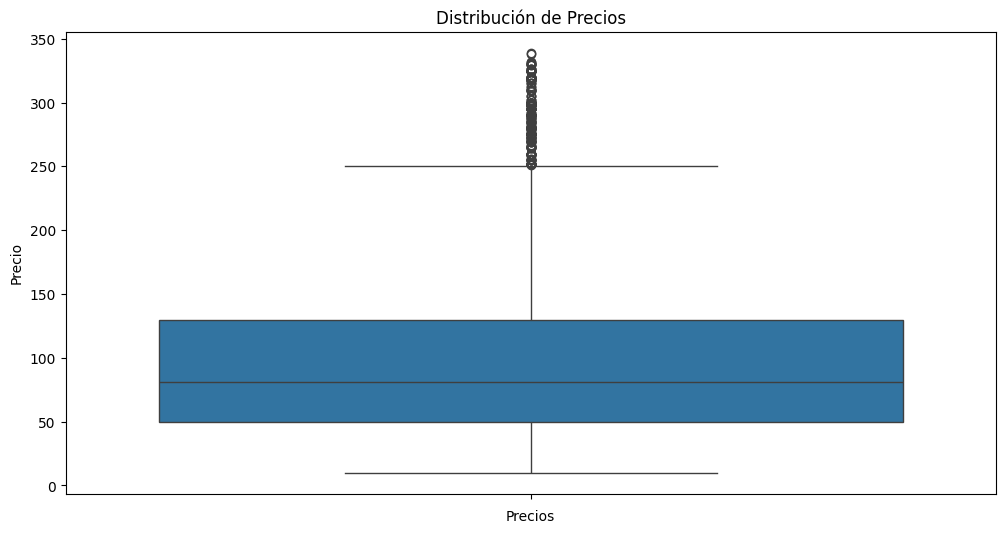

In [33]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear un boxplot de la columna 'price'
sns.boxplot(y='price', data=df)

# Configurar título y etiquetas
plt.title('Distribución de Precios')
plt.xlabel('Precios')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()

# **LIMPIEZA Y VALORES NULOS**

In [34]:
# Eliminar la columna 'square_feet' y 'neighbourhood'
df = df.drop(columns=['square_feet', 'neighbourhood'])

In [35]:
df['review_scores_value'].value_counts()

,count
review_scores_value,
10.0,2955
9.0,2148
8.0,578
7.0,74
6.0,69
2.0,11
4.0,10
5.0,7
3.0,1


In [36]:
# Eliminamos los valores NaN en la columna 'review_scores_value' y lo suplantamos con el valor de 10; ya que por defecto se entiende que experiencia fue buena por ende no se registró ningún comentario del tipo "negativo".
df['review_scores_value'] = df['review_scores_value'].fillna(10)

# Mostrar el DataFrame resultante
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7846 entries, 0 to 9000
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        7846 non-null   object 
 1   country              7846 non-null   object 
 2   city                 7839 non-null   object 
 3   bathrooms            7824 non-null   float64
 4   number_of_reviews    7846 non-null   float64
 5   room_type            7846 non-null   object 
 6   bed_type             7846 non-null   object 
 7   amenities            7782 non-null   object 
 8   price                7846 non-null   float64
 9   extra_people         7846 non-null   float64
 10  availability_365     7846 non-null   float64
 11  geolocation          7846 non-null   object 
 12  guests_included      7846 non-null   float64
 13  bedrooms             7843 non-null   float64
 14  beds                 7829 non-null   float64
 15  review_scores_value  7846 non-null   float6

In [37]:
# Eliminar filas con valores nulos excepto en 'review_scores_value' y 'neighbourhood'
columns_to_check = [col for col in df.columns if col not in ['review_scores_value',]]
df = df.dropna(subset=columns_to_check)
# Mostrar el DataFrame resultante
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7742 entries, 0 to 9000
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        7742 non-null   object 
 1   country              7742 non-null   object 
 2   city                 7742 non-null   object 
 3   bathrooms            7742 non-null   float64
 4   number_of_reviews    7742 non-null   float64
 5   room_type            7742 non-null   object 
 6   bed_type             7742 non-null   object 
 7   amenities            7742 non-null   object 
 8   price                7742 non-null   float64
 9   extra_people         7742 non-null   float64
 10  availability_365     7742 non-null   float64
 11  geolocation          7742 non-null   object 
 12  guests_included      7742 non-null   float64
 13  bedrooms             7742 non-null   float64
 14  beds                 7742 non-null   float64
 15  review_scores_value  7742 non-null   float6

In [38]:
# Eliminamos los valores NaN en la columna 'review_scores_value'
#y lo suplantamos con el valor de 10; ya que por defecto se entiende que la experiencia
#fue buena por ende no se registró ningún comentario del tipo "negativo".
df['review_scores_value'] = df['review_scores_value'].fillna(10)

# Mostrar el DataFrame resultante
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7742 entries, 0 to 9000
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        7742 non-null   object 
 1   country              7742 non-null   object 
 2   city                 7742 non-null   object 
 3   bathrooms            7742 non-null   float64
 4   number_of_reviews    7742 non-null   float64
 5   room_type            7742 non-null   object 
 6   bed_type             7742 non-null   object 
 7   amenities            7742 non-null   object 
 8   price                7742 non-null   float64
 9   extra_people         7742 non-null   float64
 10  availability_365     7742 non-null   float64
 11  geolocation          7742 non-null   object 
 12  guests_included      7742 non-null   float64
 13  bedrooms             7742 non-null   float64
 14  beds                 7742 non-null   float64
 15  review_scores_value  7742 non-null   float6

**Revisamos columna por columna del tipo "Object" para identificar lo que hay dentro.**

In [39]:
df['property_type'].value_counts()

,count
property_type,
Apartment,5508
House,1464
Bed & Breakfast,140
Loft,133
Condominium,126
Townhouse,77
Villa,74
Other,44
Dorm,32


In [40]:
df['country'].value_counts()

,count
country,
United States,2575
Spain,1537
United Kingdom,999
Germany,696
Australia,580
Netherlands,513
Belgium,228
Canada,226
Greece,189


In [41]:
df['city'].value_counts()

,count
city,
London,739
Berlin,692
New York,647
Barcelona,603
Brooklyn,592
...,...
Child Lane Greenwich,1
"Whitton,Twickenham",1
"East Twickenham, richmond road",1


In [42]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,4393
Private room,3188
Shared room,161


In [43]:
df['bed_type'].value_counts()

,count
bed_type,
Real Bed,7539
Pull-out Sofa,94
Futon,63
Airbed,26
Couch,20


In [44]:
df['amenities'].value_counts()

,count
amenities,
Family/kid friendly,9
"translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",6
"Internet,Wireless Internet,Kitchen,Heating,Washer,Essentials",5
"Smoking allowed,Family/kid friendly",4
"Family/kid friendly,translation missing: en.hosting_amenity_50",4
...,...
"TV,Internet,Wireless Internet,Pool,Free parking on premises,Heating,Family/kid friendly,Smoke detector,Carbon monoxide detector,First aid kit,Fire extinguisher,Essentials,Lock on bedroom door,Hangers,Hair dryer",1
"TV,Cable TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Essentials",1
"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Heating,Family/kid friendly,Washer,Essentials,Shampoo",1


In [45]:
df['geolocation'].value_counts()

,count
geolocation,
"[52.35992696894107, 4.862859671199358]",1
"[51.56094173610278, -0.06680084981118882]",1
"[34.0984118835257, -118.36402217149745]",1
"[34.01434213191326, -118.27737609107892]",1
"[34.03059555508168, -118.26465809658126]",1
...,...
"[41.91010068372407, -87.69292368275366]",1
"[41.914471303286, -87.7096068598123]",1
"[41.93078396181781, -87.69554667195045]",1


In [46]:
df['features'].value_counts()

,count
features,
"Host Has Profile Pic,Host Identity Verified,Is Location Exact",1827
"Host Has Profile Pic,Is Location Exact",1197
"Host Has Profile Pic,Host Identity Verified",511
"Host Has Profile Pic,Host Identity Verified,Is Location Exact,Instant Bookable",491
Host Has Profile Pic,431
...,...
"Host Is Superhost,Host Has Profile Pic,Is Location Exact,Instant Bookable,Require Guest Phone Verification",1
"Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Is Location Exact,Instant Bookable,Require Guest Profile Picture,Require Guest Phone Verification",1
"Host Has Profile Pic,Host Identity Verified,Requires License,Require Guest Profile Picture",1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7742 entries, 0 to 9000
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        7742 non-null   object 
 1   country              7742 non-null   object 
 2   city                 7742 non-null   object 
 3   bathrooms            7742 non-null   float64
 4   number_of_reviews    7742 non-null   float64
 5   room_type            7742 non-null   object 
 6   bed_type             7742 non-null   object 
 7   amenities            7742 non-null   object 
 8   price                7742 non-null   float64
 9   extra_people         7742 non-null   float64
 10  availability_365     7742 non-null   float64
 11  geolocation          7742 non-null   object 
 12  guests_included      7742 non-null   float64
 13  bedrooms             7742 non-null   float64
 14  beds                 7742 non-null   float64
 15  review_scores_value  7742 non-null   float6

# **LIMPIEZA Y TRANSFORMACIÓN DE DATOS**

In [48]:
# Convertir las columnas especificadas a dummies para que queden numéricas
columns_to_convert = ['property_type', 'country', 'room_type', 'bed_type', 'city']
df = pd.get_dummies(df, columns=columns_to_convert)

# Mostrar el DataFrame resultante
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7742 entries, 0 to 9000
Data columns (total 659 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    bathrooms                            float64
 1    number_of_reviews                    float64
 2    amenities                            object 
 3    price                                float64
 4    extra_people                         float64
 5    availability_365                     float64
 6    geolocation                          object 
 7    guests_included                      float64
 8    bedrooms                             float64
 9    beds                                 float64
 10   review_scores_value                  float64
 11   features                             object 
 12   property_type_Apartment              bool   
 13   property_type_Bed & Breakfast        bool   
 14   property_type_Boat                   bool   
 15   property_type_Boutique h

In [49]:
# Resetear el índice
df = df.reset_index(drop=True)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7742 entries, 0 to 7741
Data columns (total 659 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    bathrooms                            float64
 1    number_of_reviews                    float64
 2    amenities                            object 
 3    price                                float64
 4    extra_people                         float64
 5    availability_365                     float64
 6    geolocation                          object 
 7    guests_included                      float64
 8    bedrooms                             float64
 9    beds                                 float64
 10   review_scores_value                  float64
 11   features                             object 
 12   property_type_Apartment              bool   
 13   property_type_Bed & Breakfast        bool   
 14   property_type_Boat                   bool   
 15   property_type_Bouti

**Hacemos separación de columnas de 'geolocation' para dividirlas en Longitud y Latitud por separado. Luego se eliminará la columna 'geolocation' para que quede divida en dos columnas. Con el fin de poder obtener o asignarse un área a la ubicación de los barrios.**

In [50]:
# Eliminar corchetes y dividir la columna 'geolocation' en latitud y longitud
df['geolocation'] = df['geolocation'].str.strip('[]')  # Eliminar los corchetes
df[['latitud', 'longitud']] = df['geolocation'].str.split(',', expand=True)

# Convertir latitud y longitud a float
df['latitud'] = df['latitud'].astype(float)
df['longitud'] = df['longitud'].astype(float)

# Eliminar la columna original 'geolocation'
df = df.drop(columns=['geolocation'])

# Mostrar el DataFrame resultante
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7742 entries, 0 to 7741
Data columns (total 660 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    bathrooms                            float64
 1    number_of_reviews                    float64
 2    amenities                            object 
 3    price                                float64
 4    extra_people                         float64
 5    availability_365                     float64
 6    guests_included                      float64
 7    bedrooms                             float64
 8    beds                                 float64
 9    review_scores_value                  float64
 10   features                             object 
 11   property_type_Apartment              bool   
 12   property_type_Bed & Breakfast        bool   
 13   property_type_Boat                   bool   
 14   property_type_Boutique hotel         bool   
 15   property_type_Bunga

In [51]:
#Verificamos que las columnas 'latitud' y 'longitud' hayan quedado correctas.
df.head()

,bathrooms,number_of_reviews,amenities,price,extra_people,availability_365,guests_included,bedrooms,beds,review_scores_value,...,city_pierrefonds,city_teddington,city_Αθήνα,city_Барселона,city_伦敦,city_深圳市,city_香港,city_홍콩,latitud,longitud
0,1.0,3.0,"Internet,Wireless Internet,Kitchen,Heating,Was...",50.0,0.0,0.0,1.0,1.0,1.0,9.0,...,False,False,False,False,False,False,False,False,52.359927,4.862860
1,1.0,16.0,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",95.0,40.0,0.0,2.0,1.0,1.0,10.0,...,False,False,False,False,False,False,False,False,52.361371,4.873860
2,1.0,0.0,"TV,Internet,Wireless Internet,Breakfast,Heatin...",160.0,0.0,178.0,1.0,1.0,1.0,10.0,...,False,False,False,False,False,False,False,False,52.364568,4.875640
3,1.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",175.0,40.0,148.0,2.0,2.0,3.0,10.0,...,False,False,False,False,False,False,False,False,52.364646,4.874049
4,1.0,12.0,"Wireless Internet,Kitchen,Hot tub,Buzzer/wirel...",100.0,15.0,0.0,2.0,1.0,1.0,10.0,...,False,False,False,False,False,False,False,False,52.358295,4.859092


**Siguente paso**: Creamos una nueva columna considerando la latitud y longitud antes divida, para poder obtener una nueva columna que nos indique con valor numérico un área asignada. Asigna áreas basadas en la proximidad de los puntos según un radio específico (en este caso, 1 km) y no requiere conocer de antemano la cantidad de barrios o áreas.

In [52]:
# Convertir latitud y longitud a radianes (necesario para BallTree)
coords = np.radians(df[['latitud', 'longitud']].values)

# Definir el radio en kilómetros
radius_km = 1.0  # 1 km de radio
radius = radius_km / 6371.0  # Convertir a radianes (6371 es el radio de la Tierra en km)

# Construir BallTree
tree = BallTree(coords, metric='haversine')

# Encontrar todos los puntos dentro del radio
areas = np.full(len(df), -1)  # Inicializar todas las áreas con -1
area_counter = 0

for i in range(len(df)):
    if areas[i] == -1:
        # Encontrar vecinos dentro del radio
        indices = tree.query_radius([coords[i]], r=radius)[0]
        for idx in indices:
            if areas[idx] == -1:
                areas[idx] = area_counter
        area_counter += 1

# Agregar las áreas al DataFrame
df['area'] = areas

# Mostrar el DataFrame resultante
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7742 entries, 0 to 7741
Data columns (total 661 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    bathrooms                            float64
 1    number_of_reviews                    float64
 2    amenities                            object 
 3    price                                float64
 4    extra_people                         float64
 5    availability_365                     float64
 6    guests_included                      float64
 7    bedrooms                             float64
 8    beds                                 float64
 9    review_scores_value                  float64
 10   features                             object 
 11   property_type_Apartment              bool   
 12   property_type_Bed & Breakfast        bool   
 13   property_type_Boat                   bool   
 14   property_type_Boutique hotel         bool   
 15   property_type_Bunga

In [53]:
#Verificamos que las columnas 'latitud' y 'longitud' hayan quedado correctas.
df['area'].value_counts()

,count
area,
42,139
706,83
44,83
43,83
788,76
...,...
1179,1
1180,1
487,1


**Continuamos con la limpieza y transformación, ahora seleccionamos los últimos Object que quedan y se convierten las columnas en listas separadas por comas.**

In [54]:
df['amenities'] = df['amenities'].apply(lambda x: x.split(','))
df['features'] = df['features'].apply(lambda x: x.split(','))

In [55]:
# Aplicar One-Hot Encoding
amenities_dummies = df['amenities'].explode().str.get_dummies().groupby(level=0).max()
features_dummies = df['features'].explode().str.get_dummies().groupby(level=0).max()

# Unir los dummies al DataFrame original
df = df.drop(['amenities', 'features'], axis=1)
df = pd.concat([df, amenities_dummies, features_dummies], axis=1)

# Mostrar el DataFrame resultante
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7742 entries, 0 to 7741
Data columns (total 788 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    bathrooms                                   float64
 1    number_of_reviews                           float64
 2    price                                       float64
 3    extra_people                                float64
 4    availability_365                            float64
 5    guests_included                             float64
 6    bedrooms                                    float64
 7    beds                                        float64
 8    review_scores_value                         float64
 9    property_type_Apartment                     bool   
 10   property_type_Bed & Breakfast               bool   
 11   property_type_Boat                          bool   
 12   property_type_Boutique hotel                bool   
 13   property_type_Bu

In [56]:
# Convertir todas las columnas booleanas a enteros
df2 = df.select_dtypes(include=['bool']).astype(int)

# Reemplazar las columnas originales en el DataFrame
df[df2.columns] = df2

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7742 entries, 0 to 7741
Data columns (total 788 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    bathrooms                                   float64
 1    number_of_reviews                           float64
 2    price                                       float64
 3    extra_people                                float64
 4    availability_365                            float64
 5    guests_included                             float64
 6    bedrooms                                    float64
 7    beds                                        float64
 8    review_scores_value                         float64
 9    property_type_Apartment                     int64  
 10   property_type_Bed & Breakfast               int64  
 11   property_type_Boat                          int64  
 12   property_type_Boutique hotel                int64  
 13   property_type_Bu

In [57]:
df.to_csv('airbnb_nvo2')

In [59]:
pd.read_csv('airbnb_nvo2')

,Unnamed: 0,bathrooms,number_of_reviews,price,extra_people,availability_365,guests_included,bedrooms,beds,review_scores_value,...,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Host Has Profile Pic,Host Identity Verified,Host Is Superhost,Instant Bookable,Is Location Exact,Require Guest Phone Verification,Require Guest Profile Picture,Requires License
0,0,1.0,3.0,50.0,0.0,0.0,1.0,1.0,1.0,9.0,...,0,0,1,0,0,0,0,0,0,0
1,1,1.0,16.0,95.0,40.0,0.0,2.0,1.0,1.0,10.0,...,1,1,1,1,1,0,1,0,0,0
2,2,1.0,0.0,160.0,0.0,178.0,1.0,1.0,1.0,10.0,...,0,0,1,0,0,0,1,0,0,0
3,3,1.0,1.0,175.0,40.0,148.0,2.0,2.0,3.0,10.0,...,0,0,1,1,0,0,1,0,0,0
4,4,1.0,12.0,100.0,15.0,0.0,2.0,1.0,1.0,10.0,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,7737,1.0,0.0,125.0,0.0,182.0,1.0,1.0,1.0,10.0,...,1,1,1,1,0,0,1,0,0,0
7738,7738,1.0,51.0,120.0,0.0,62.0,1.0,2.0,2.0,9.0,...,0,0,1,0,0,0,0,0,0,0
7739,7739,2.0,3.0,250.0,0.0,42.0,1.0,3.0,3.0,10.0,...,0,0,1,0,0,0,1,0,0,0
7740,7740,1.0,0.0,100.0,10.0,364.0,1.0,1.0,1.0,10.0,...,0,1,1,1,0,1,0,0,0,0


# **MODELOS**

In [60]:
# Verificar si la columna 'Unnamed: 0' existe y eliminarla
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

**Librerías necesarias para el entrenamiento**

In [61]:
#Librerías que se utilizarán para utilizar los modelos.
#Regresión lineal
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Regresión logarítmica.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# **Entrenamiento de Modelo de Regresión lineal**


**Creamos un modelo de regresión lineal**

In [62]:
# Separar las características (X) y la variable objetivo (y)
if 'price' in df.columns:
    X = df.drop(columns=['price'])
y = df['price']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

#Valores sin eliminar outliers
# "Mean Squared Error: 4.324721063390748e+20 R² Score: -1.2580161159273716e+1"

Mean Squared Error: 8.534959835501889e+17
R² Score: -188999444973903.47


Otras medidas para evaluar:
Mean Absolute Error(MAE)

In [66]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
# Valores sin eliminar outliers "Mean Absolute Error: 601711973.4091426"

Mean Absolute Error: 34643538.0431691


Mean Absolute Percentage Error (MAPE)

In [67]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

# Valores sin eliminar outliers "Mean Absolute Percentage Error: 674163995.535962%"

Mean Absolute Percentage Error: 64196509.064154744%


Grafico lineal de los valores reales y los valores predichos

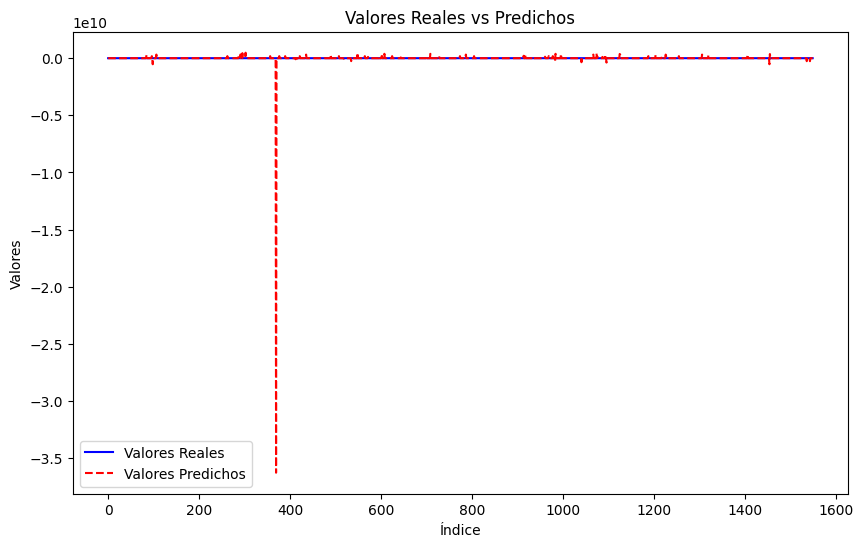

In [68]:
# Ordenar los valores para una mejor visualización
y_test_sorted = np.sort(y_test)
y_pred_sorted = y_pred[np.argsort(y_test)]

# Crear el gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Valores Reales', color='blue', linestyle='-')
plt.plot(y_pred_sorted, label='Valores Predichos', color='red', linestyle='--')

# Añadir título y etiquetas
plt.title('Valores Reales vs Predichos')
plt.xlabel('Índice')
plt.ylabel('Valores')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

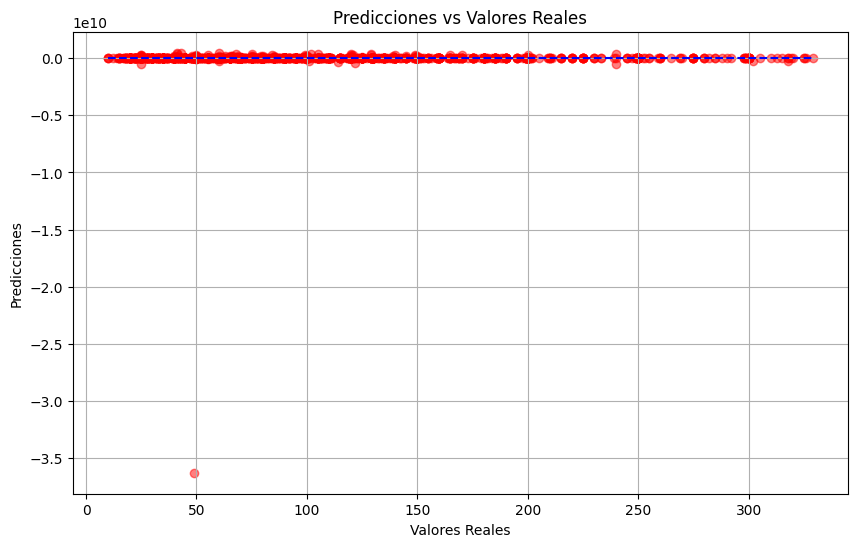

In [69]:
# Gráfico de dispersión de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# **Entrenamiento de Modelo de Regresión logarítmica (Random Forest)**

Mean Squared Error: 1739.3561948999354
R² Score: 0.6148343263660137


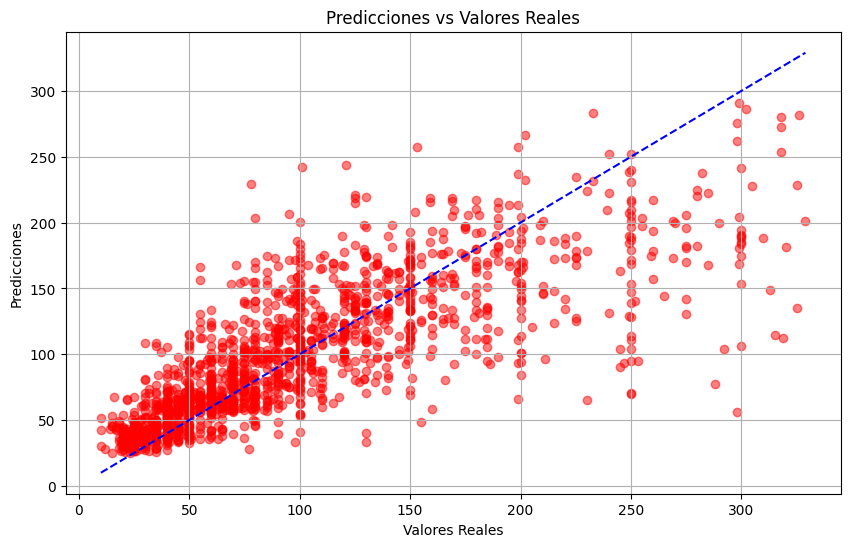

In [70]:
# Crear y entrenar el modelo de regresión Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Gráfico de dispersión de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

#Valores sin eliminar outliers antes:
#"Mean Squared Error: 7374.6504538018435 R² Score: 0.7854791330070208"

In [71]:
# Calcular MAE para Random Forest
mae_rf = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) with Random Forest: {mae_rf}')

# Calcular MAPE para Random Forest
mape_rf = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE) with Random Forest: {mape_rf * 100}%')

Mean Absolute Error (MAE) with Random Forest: 28.285532601678497
Mean Absolute Percentage Error (MAPE) with Random Forest: 34.191507950764915%


# **CONCLUSIONES**

Luego de haber iniciado los primeros entrenamientos optando por dos modelos se puede observar que la primera (Regresión lineal) tiene un desempeño muy pobre; no captura la relación entre las variables y la segunda (random forest) un desempeño decente; captura una buena parte de la variabilidad en los datos y genera predicciones razonablemente precisas aunque todavia falten mejoras para llegar a un número más cercano.